In [21]:
# Googleドライブマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 事前準備

In [22]:
# 提出ファイル名
sub_name = 'pm_lightgbm_groupkfold_country'

# 削除するカラム
del_columns = ['pm25_mid', 'id']

# データの読み込みと確認

In [23]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# ランダムシードの設定
import random
np.random.seed(1234)
random.seed(1234)

# データの読み込み
df = pd.read_csv('/content/drive/MyDrive/pm/data/processed/processed_df.csv')
submission = pd.read_csv('/content/drive/MyDrive/pm/data/input/submit_sample.csv', header=None)

In [24]:
df

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid,hemisphere,highSeason,season
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,...,1.983,17,7.671,10.358,15.112,13.424,19.901,1,0,summer
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,...,10.411,62,21.324,23.813,24.221,2.021,13.741,1,0,summer
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,...,15.719,22,10.309,13.133,15.422,6.355,25.918,1,0,summer
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,...,2.485,116,7.146,10.685,13.344,9.417,174.370,1,0,summer
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,...,1.937,93,1.091,3.277,12.272,4.109,167.063,1,0,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249445,249446,2021,12,31,Turkey,Adana,36.98615,35.32531,97,4.674,...,12.130,86,0.451,3.112,4.512,3.938,NaN,0,1,winter
249446,249447,2021,12,31,Turkey,Bursa,40.19559,29.06013,123,17.621,...,1.468,115,3.894,6.823,6.861,2.145,NaN,0,1,winter
249447,249448,2021,12,31,Turkey,Trabzon,41.00500,39.72694,150,0.128,...,3.965,12,5.269,8.772,12.661,13.201,NaN,0,1,winter
249448,249449,2021,12,31,United Kingdom,London,51.50853,-0.12574,21,0.057,...,3.268,34,10.906,10.959,12.744,0.822,NaN,0,1,winter


# 特徴量エンジニアリング

In [25]:
# object型の変数の取得
categories = df.columns[df.dtypes == 'object']
print(categories)

# label Encoding
for cat in categories:
    le = LabelEncoder() 
    print(cat)
    
    df[cat].fillna('missing', inplace=True)
    le = le.fit(df[cat])
    df[cat] = le.transform(df[cat])
    # LabelEncoderは数値に変換するだけであるため、最後にastype('category')としておく
    df[cat] = df[cat].astype('category') 

Index(['Country', 'City', 'season'], dtype='object')
Country
City
season


In [26]:
# trainとtestに再分割
train = df[~df['pm25_mid'].isnull()]
test = df[df['pm25_mid'].isnull()]

# モデルの構築と評価

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 878.634
[20]	valid_0's l2: 749.643
[30]	valid_0's l2: 711.949
[40]	valid_0's l2: 693.868
[50]	valid_0's l2: 681.32
[60]	valid_0's l2: 673.209
[70]	valid_0's l2: 671.441
[80]	valid_0's l2: 667.948
[90]	valid_0's l2: 665.259
[100]	valid_0's l2: 661.414
[110]	valid_0's l2: 660.623
[120]	valid_0's l2: 659.269
[130]	valid_0's l2: 658.181
[140]	valid_0's l2: 657.64
[150]	valid_0's l2: 656.264
[160]	valid_0's l2: 655.55
[170]	valid_0's l2: 655.21
[180]	valid_0's l2: 654.611
[190]	valid_0's l2: 653.613
[200]	valid_0's l2: 654.141
[210]	valid_0's l2: 654.028
Early stopping, best iteration is:
[192]	valid_0's l2: 653.592
25.56544955997741


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 993.158
[20]	valid_0's l2: 820.898
[30]	valid_0's l2: 752.378
[40]	valid_0's l2: 721.034
[50]	valid_0's l2: 700.476
[60]	valid_0's l2: 687.412
[70]	valid_0's l2: 678.575
[80]	valid_0's l2: 673.528
[90]	valid_0's l2: 669.382
[100]	valid_0's l2: 665.017
[110]	valid_0's l2: 662.974
[120]	valid_0's l2: 659.575
[130]	valid_0's l2: 658.569
[140]	valid_0's l2: 656.737
[150]	valid_0's l2: 655.713
[160]	valid_0's l2: 654.224
[170]	valid_0's l2: 653.858
[180]	valid_0's l2: 652.827
[190]	valid_0's l2: 653.604
[200]	valid_0's l2: 653.007
[210]	valid_0's l2: 651.339
[220]	valid_0's l2: 650.736
[230]	valid_0's l2: 650.417
[240]	valid_0's l2: 650.29
[250]	valid_0's l2: 649.782
[260]	valid_0's l2: 649.547
[270]	valid_0's l2: 649.213
[280]	valid_0's l2: 649.451
[290]	valid_0's l2: 649.493
Early stopping, best iteration is:
[275]	valid_0's l2: 648.902
25.47354622578157


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 1148.26
[20]	valid_0's l2: 963.696
[30]	valid_0's l2: 904.486
[40]	valid_0's l2: 872.61
[50]	valid_0's l2: 857.246
[60]	valid_0's l2: 844.833
[70]	valid_0's l2: 835.215
[80]	valid_0's l2: 828.34
[90]	valid_0's l2: 825.737
[100]	valid_0's l2: 820.784
[110]	valid_0's l2: 818.844
[120]	valid_0's l2: 817.304
[130]	valid_0's l2: 819.158
[140]	valid_0's l2: 817.196
[150]	valid_0's l2: 817.126
[160]	valid_0's l2: 815.728
[170]	valid_0's l2: 815.417
[180]	valid_0's l2: 814.387
[190]	valid_0's l2: 814.883
[200]	valid_0's l2: 815.103
Early stopping, best iteration is:
[182]	valid_0's l2: 813.941
28.529644096341993


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 812.646
[20]	valid_0's l2: 683.445
[30]	valid_0's l2: 644.554
[40]	valid_0's l2: 624.344
[50]	valid_0's l2: 610.666
[60]	valid_0's l2: 602.653
[70]	valid_0's l2: 597.033
[80]	valid_0's l2: 589.764
[90]	valid_0's l2: 585.632
[100]	valid_0's l2: 583.107
[110]	valid_0's l2: 579.789
[120]	valid_0's l2: 577.601
[130]	valid_0's l2: 577.006
[140]	valid_0's l2: 576.101
[150]	valid_0's l2: 575.027
[160]	valid_0's l2: 573.951
[170]	valid_0's l2: 573.119
[180]	valid_0's l2: 571.544
[190]	valid_0's l2: 571.702
[200]	valid_0's l2: 570.608
[210]	valid_0's l2: 570.562
[220]	valid_0's l2: 570.534
[230]	valid_0's l2: 570.631
[240]	valid_0's l2: 569.405
[250]	valid_0's l2: 569.332
[260]	valid_0's l2: 569.127
[270]	valid_0's l2: 569.546
Early stopping, best iteration is:
[257]	valid_0's l2: 569.034
23.854437764173852


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 747.606
[20]	valid_0's l2: 634.329
[30]	valid_0's l2: 597.537
[40]	valid_0's l2: 580.759
[50]	valid_0's l2: 569.983
[60]	valid_0's l2: 563.065
[70]	valid_0's l2: 558.857
[80]	valid_0's l2: 555.502
[90]	valid_0's l2: 554.262
[100]	valid_0's l2: 552.06
[110]	valid_0's l2: 549.679
[120]	valid_0's l2: 547.562
[130]	valid_0's l2: 545.681
[140]	valid_0's l2: 544.533
[150]	valid_0's l2: 542.983
[160]	valid_0's l2: 541.911
[170]	valid_0's l2: 541.199
[180]	valid_0's l2: 540.804
[190]	valid_0's l2: 539.977
[200]	valid_0's l2: 538.716
[210]	valid_0's l2: 538.404
[220]	valid_0's l2: 537.335
[230]	valid_0's l2: 536.914
[240]	valid_0's l2: 536.408
[250]	valid_0's l2: 536.093
[260]	valid_0's l2: 535.582
[270]	valid_0's l2: 534.89
[280]	valid_0's l2: 534.489
[290]	valid_0's l2: 534.808
[300]	valid_0's l2: 534.044
[310]	valid_0's l2: 534.206
[320]	valid_0's l2: 534.149
Early stopping, best iteration is:
[306]	valid_0's l2

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 656.736
[20]	valid_0's l2: 573.794
[30]	valid_0's l2: 549.378
[40]	valid_0's l2: 535.681
[50]	valid_0's l2: 528.996
[60]	valid_0's l2: 523.597
[70]	valid_0's l2: 520.201
[80]	valid_0's l2: 517.488
[90]	valid_0's l2: 516.314
[100]	valid_0's l2: 514.861
[110]	valid_0's l2: 513.875
[120]	valid_0's l2: 513.028
[130]	valid_0's l2: 511.806
[140]	valid_0's l2: 510.434
[150]	valid_0's l2: 510.448
[160]	valid_0's l2: 509.634
[170]	valid_0's l2: 509.006
[180]	valid_0's l2: 508.721
[190]	valid_0's l2: 508.321
[200]	valid_0's l2: 508.205
[210]	valid_0's l2: 508.041
[220]	valid_0's l2: 507.422
[230]	valid_0's l2: 507.098
[240]	valid_0's l2: 507.448
[250]	valid_0's l2: 507.358
Early stopping, best iteration is:
[234]	valid_0's l2: 506.837
22.513045793757346


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 829.106
[20]	valid_0's l2: 749.406
[30]	valid_0's l2: 723.606
[40]	valid_0's l2: 703.867
[50]	valid_0's l2: 692.575
[60]	valid_0's l2: 687.472
[70]	valid_0's l2: 684.61
[80]	valid_0's l2: 682.698
[90]	valid_0's l2: 679.675
[100]	valid_0's l2: 675.449
[110]	valid_0's l2: 673.205
[120]	valid_0's l2: 672.27
[130]	valid_0's l2: 669.426
[140]	valid_0's l2: 669.651
[150]	valid_0's l2: 668.465
[160]	valid_0's l2: 667.717
[170]	valid_0's l2: 667.116
[180]	valid_0's l2: 665.921
[190]	valid_0's l2: 665.944
[200]	valid_0's l2: 665.771
Early stopping, best iteration is:
[184]	valid_0's l2: 665.318
25.793765335240607


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 1023.3
[20]	valid_0's l2: 866.129
[30]	valid_0's l2: 799.008
[40]	valid_0's l2: 767.042
[50]	valid_0's l2: 744.879
[60]	valid_0's l2: 735.044
[70]	valid_0's l2: 727.018
[80]	valid_0's l2: 722.552
[90]	valid_0's l2: 715.717
[100]	valid_0's l2: 710.84
[110]	valid_0's l2: 707.082
[120]	valid_0's l2: 704.413
[130]	valid_0's l2: 701.79
[140]	valid_0's l2: 699.481
[150]	valid_0's l2: 697.552
[160]	valid_0's l2: 695.829
[170]	valid_0's l2: 694.821
[180]	valid_0's l2: 694.347
[190]	valid_0's l2: 694.161
[200]	valid_0's l2: 693.231
[210]	valid_0's l2: 692.015
[220]	valid_0's l2: 691.303
[230]	valid_0's l2: 690.615
[240]	valid_0's l2: 690.647
Early stopping, best iteration is:
[225]	valid_0's l2: 689.978
26.26742336326212


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 598.408
[20]	valid_0's l2: 511.875
[30]	valid_0's l2: 483.533
[40]	valid_0's l2: 470.695
[50]	valid_0's l2: 462.836
[60]	valid_0's l2: 456.351
[70]	valid_0's l2: 452.559
[80]	valid_0's l2: 450.622
[90]	valid_0's l2: 448.538
[100]	valid_0's l2: 446.266
[110]	valid_0's l2: 444.318
[120]	valid_0's l2: 442.966
[130]	valid_0's l2: 441.896
[140]	valid_0's l2: 440.592
[150]	valid_0's l2: 439.506
[160]	valid_0's l2: 438.243
[170]	valid_0's l2: 437.681
[180]	valid_0's l2: 437.742
[190]	valid_0's l2: 437.437
[200]	valid_0's l2: 436.423
[210]	valid_0's l2: 436.231
[220]	valid_0's l2: 436.205
[230]	valid_0's l2: 435.842
[240]	valid_0's l2: 435.682
[250]	valid_0's l2: 435.268
[260]	valid_0's l2: 434.894
[270]	valid_0's l2: 434.653
[280]	valid_0's l2: 434.096
[290]	valid_0's l2: 433.406
[300]	valid_0's l2: 433.025
[310]	valid_0's l2: 432.601
[320]	valid_0's l2: 432.366
[330]	valid_0's l2: 432.36
[340]	valid_0's l2: 432.

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 20 rounds.
[10]	valid_0's l2: 1835.99
[20]	valid_0's l2: 1563.57
[30]	valid_0's l2: 1476.4
[40]	valid_0's l2: 1430.59
[50]	valid_0's l2: 1400.19
[60]	valid_0's l2: 1384.99
[70]	valid_0's l2: 1374.46
[80]	valid_0's l2: 1366.62
[90]	valid_0's l2: 1364.89
[100]	valid_0's l2: 1359.53
[110]	valid_0's l2: 1361.25
Early stopping, best iteration is:
[95]	valid_0's l2: 1357.13
36.839284983134355
25.871318703327137


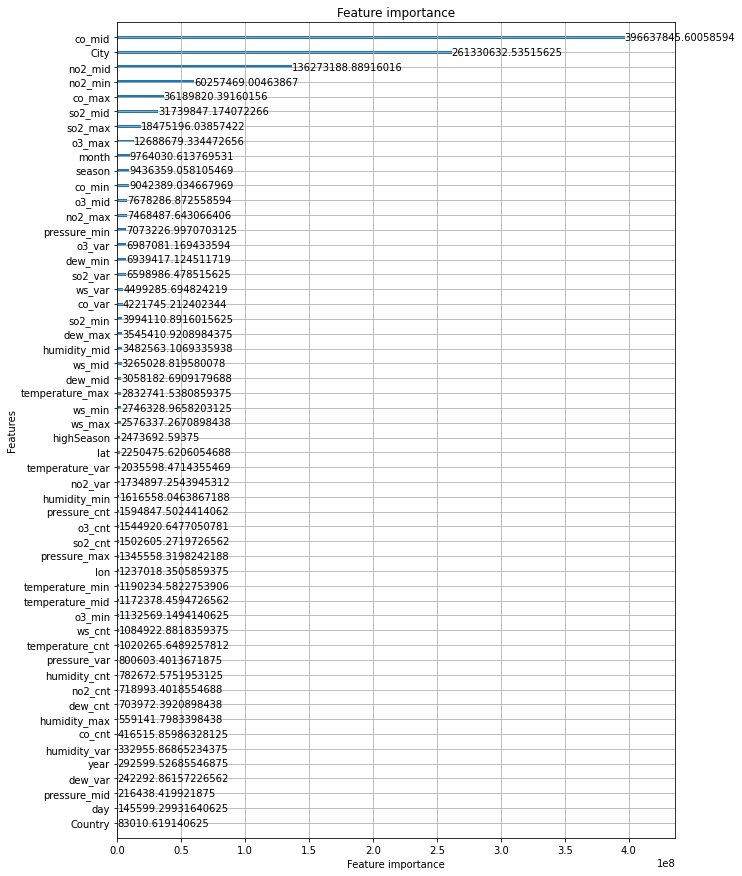

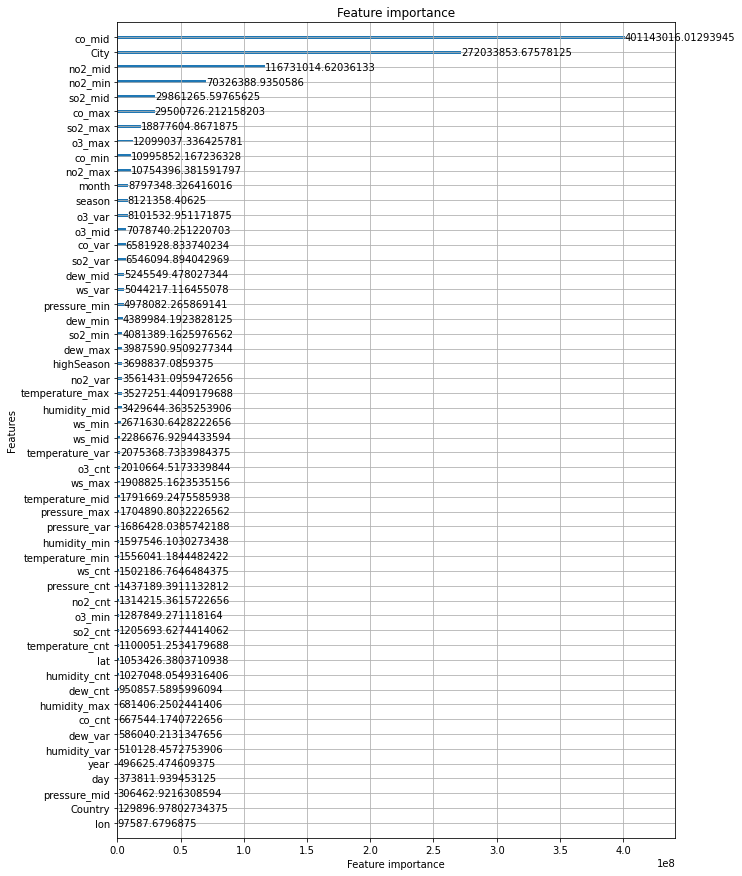

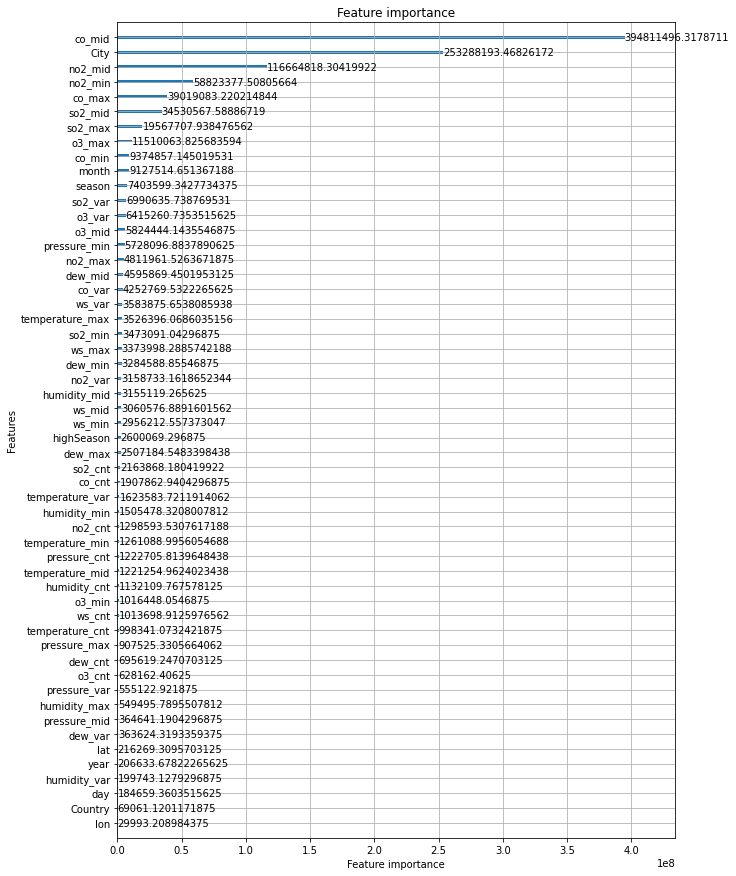

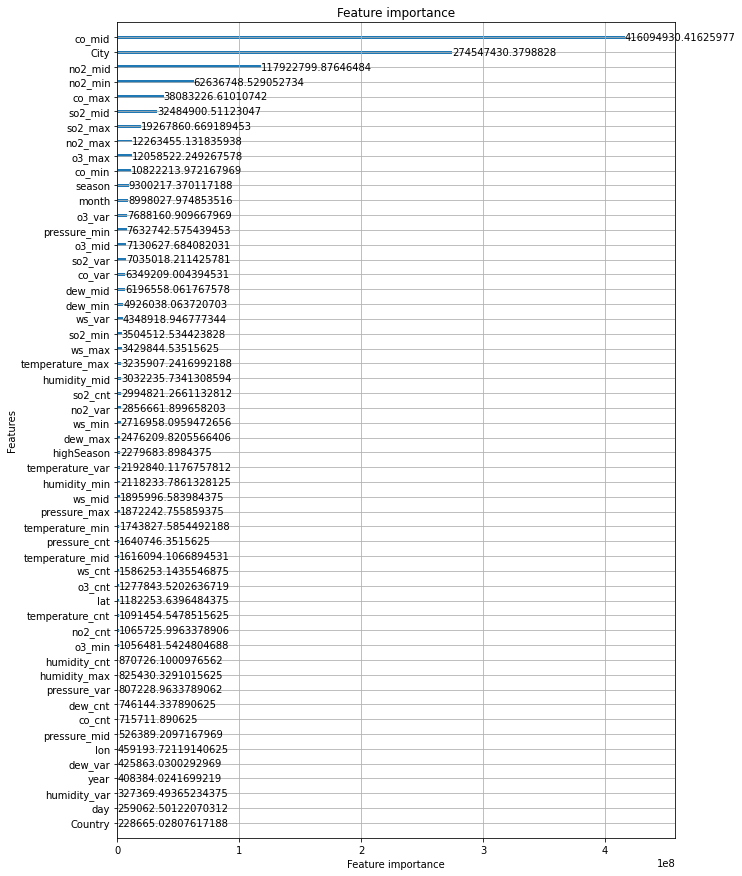

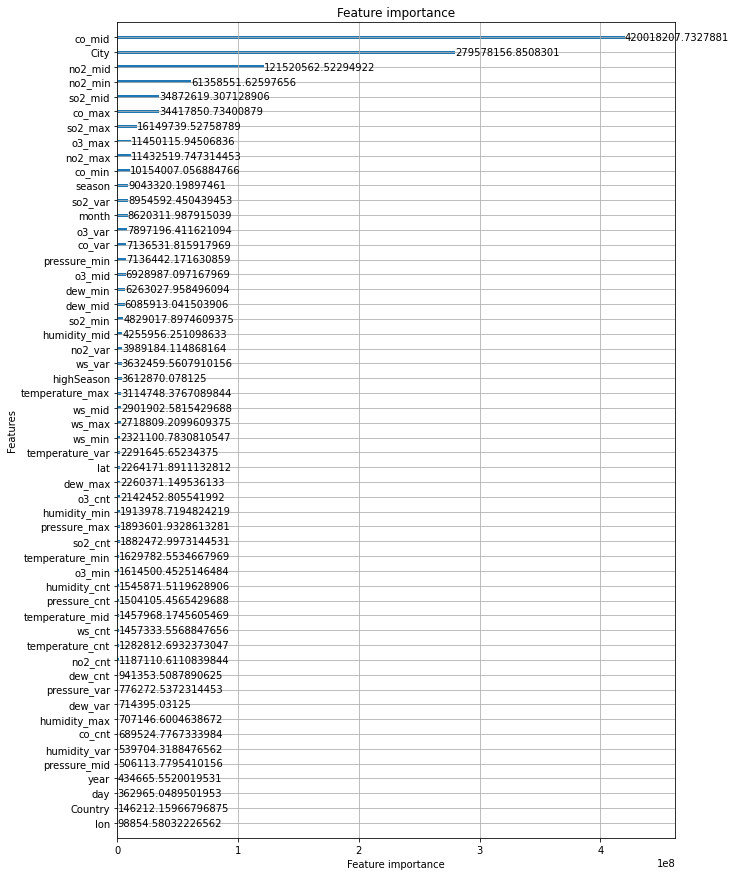

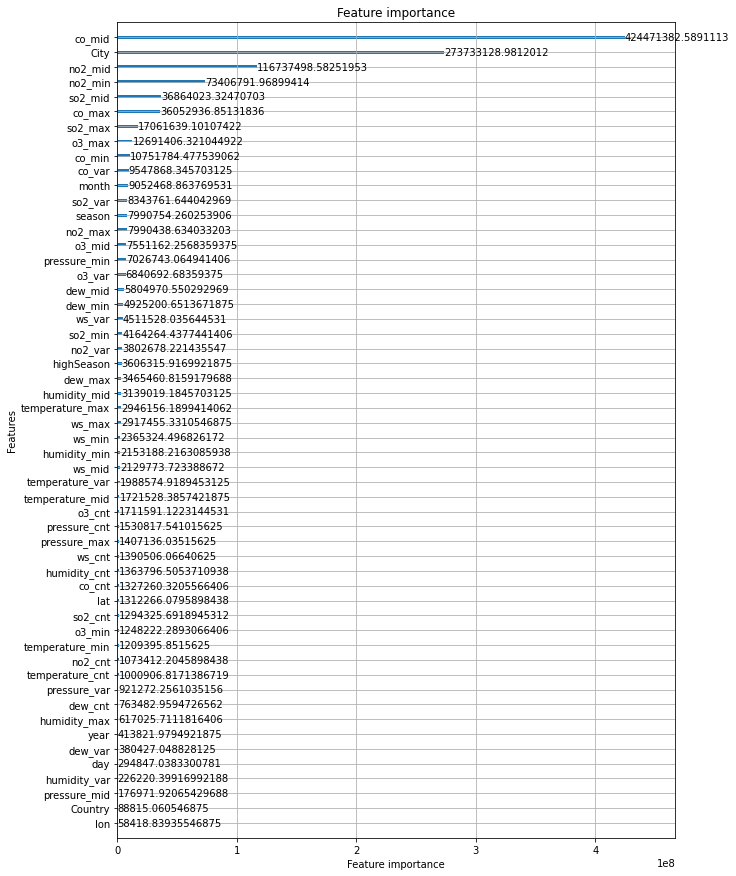

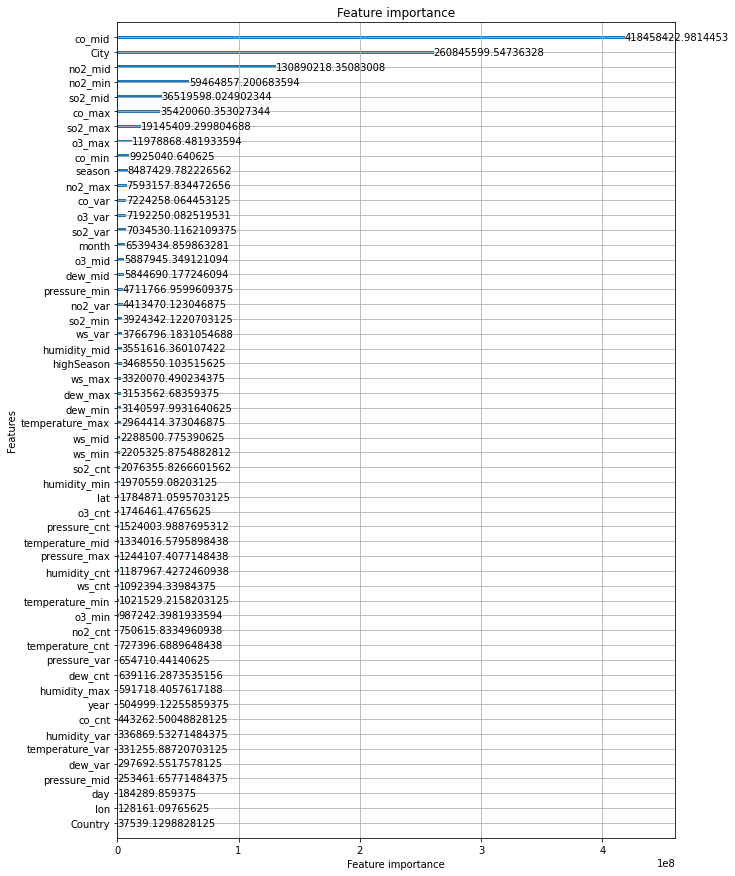

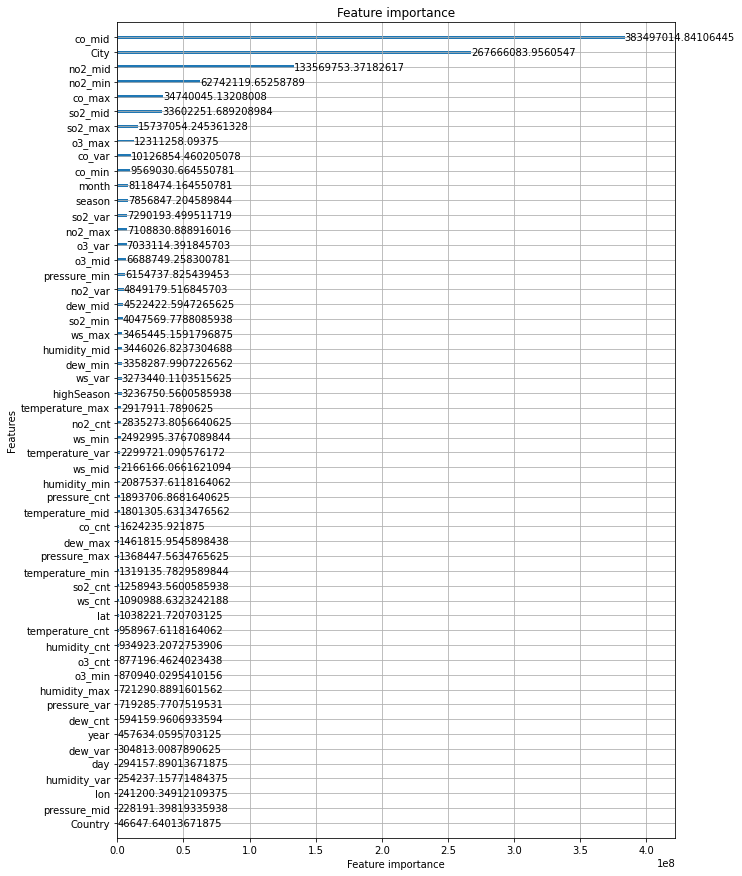

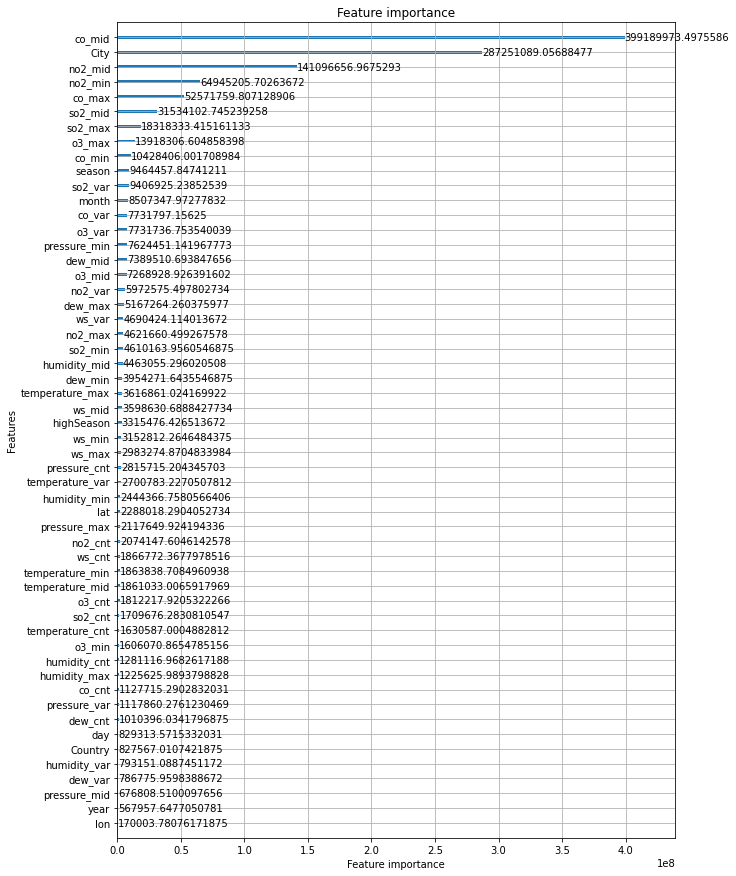

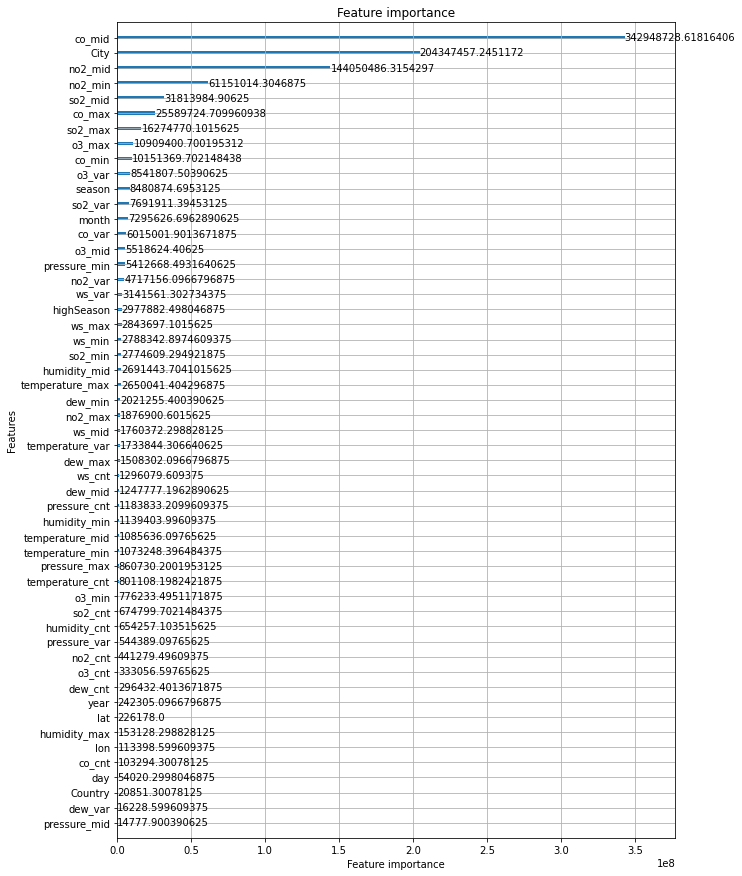

In [27]:
# ライブラリのインポート
import lightgbm as lgb
from sklearn.model_selection import GroupKFold
from sklearn.metrics import mean_squared_error
from statistics import mean

# K分割する
folds = 10
kf = GroupKFold(n_splits=folds)
groups = train['City']

# ハイパーパラメータの設定
params = {
    'objective':'regression',
    'random_seed':1234, 
}

# 説明変数と目的変数を指定
X_train = train.drop(del_columns, axis=1)
Y_train = train['pm25_mid']

# 各foldごとに作成したモデルごとの予測値を保存
models = []
rmses = []

for train_index, val_index in kf.split(X_train, Y_train, groups):
    x_train = X_train.iloc[train_index]
    x_valid = X_train.iloc[val_index]
    y_train = Y_train.iloc[train_index]
    y_valid = Y_train.iloc[val_index]
    
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)    
    
    model = lgb.train(params,
                      lgb_train, 
                      valid_sets=lgb_eval, 
                      num_boost_round=1000, # 学習回数の実行回数
                      early_stopping_rounds=20, # early_stoppingの判定基準
                      verbose_eval=10)
    
    y_pred = model.predict(x_valid, num_iteration=model.best_iteration)
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    print(rmse)
    
    models.append(model)
    rmses.append(rmse)

# 平均AUCを計算する
print(mean(rmses))

# 特徴量重要度の表示
for model in models:
    lgb.plot_importance(model, importance_type='gain',
                        figsize=(10, 15),
                        max_num_features=len(train.columns))

予測精度：20.038853887951266

# テストデータの予測

In [28]:
# テストデータの説明変数を指定
X_test = test.drop(del_columns, axis=1)

# テストデータにおける予測
preds = []

for model in models:
    pred = model.predict(X_test)
    preds.append(pred)

# predsの平均を計算
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

# 提出

In [29]:
# 値を置き換え
submission[1] = preds_mean

# CSVファイルの出力
submission.to_csv(f'/content/drive/MyDrive/pm/submit/{sub_name}.csv', header=None, index=False)